# The Sparks Foundation GRIP APRIL 2023

## Data Science and Business Analytics Internship

## Task 1: Prediction using supervised ML

### Author : Siddharth Patondikar

### Objective : Predict the percentage of an student based on the no. of study hours. 

### Importing Libraries

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Loading Dataset

In [2]:
#Loading the dataset

file_path = 'http://bit.ly/w-data'

score_df = pd.read_csv(file_path)
score_df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
score_df.shape

(25, 2)

In [4]:
score_df.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
score_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#Checking Null Values

score_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Visualization

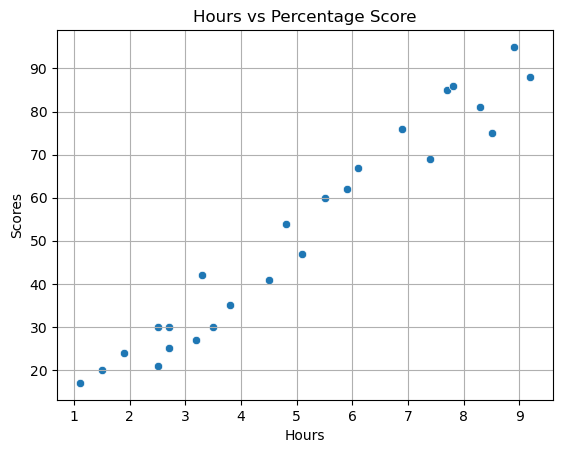

In [8]:
#Plotting distribution of scores

sns.scatterplot(x=score_df['Hours'],y=score_df['Scores'])
plt.title('Hours vs Percentage Score')
plt.grid()
plt.show()

From above plot it is clearly visible that Hours studied and Percantage Scores has positive linear relation 

<AxesSubplot:>

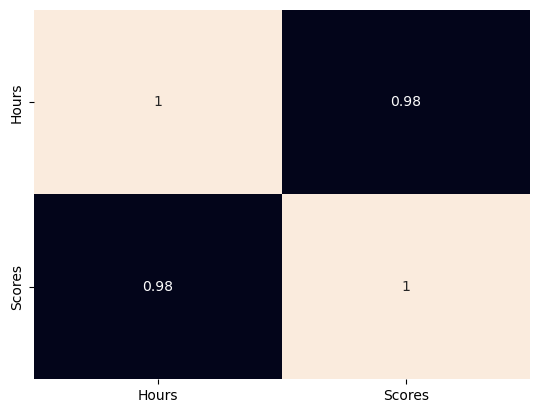

In [9]:
#Correlation Heatmap

sns.heatmap(score_df.corr(),annot=True,cbar=False)

Hours and Scores has positive correlation of 0.98

### Model Building

In [10]:
#Preparing the data

X = score_df[['Hours']].values
y = score_df[['Scores']].values

In [11]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [12]:
print(y)

[[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


In [13]:
#Splitting and creating train and test dataset. Taking 80% data for train and 20% for test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [14]:
#Training the data

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

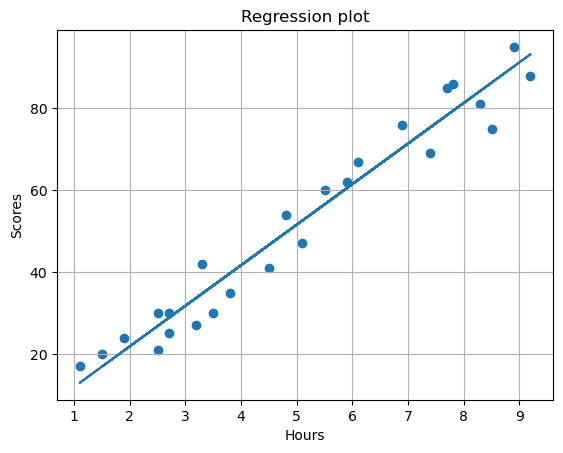

In [15]:
#Plotting regression plot

#regression line y = m*x + c [m=coefficient, c=intercept]

m = reg.coef_
c = reg.intercept_

line = m*X + c
plt.scatter(X,y)
plt.plot(X,line)
plt.title('Regression plot')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid()
plt.show()

### Making Predictions

In [23]:
#Making Predictions

y_pred = reg.predict(X_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [24]:
score_df['predicted_scores'] = reg.predict(score_df[['Hours']])
score_df.head()

D:\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,Hours,Scores,predicted_scores
0,2.5,21,26.794801
1,5.1,47,52.562508
2,3.2,27,33.732261
3,8.5,75,86.258740
4,3.5,30,36.705458


#### What will be predicted score if a student studies for 9.25 hrs/ day?

In [25]:
print(reg.predict([[9.25]]))

[[93.69173249]]


The score if a student studies 9.25 hrs/day is 93.69%

### Visualizing on test data

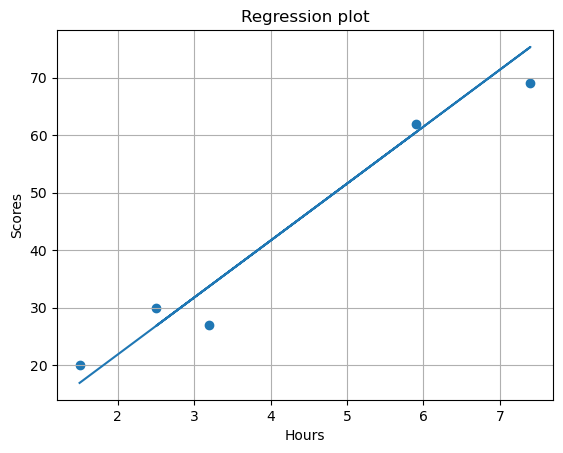

In [26]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)
plt.title('Regression plot')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid()
plt.show()

### Model Evaluation

In [28]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(f'r2 score is {r2}')

r2 score is 0.9454906892105354


The r2 score for the above model is 0.945 which is good.